## About 

A simple python utility that downloads data from the following web portal in form of CSV and performs basic EDA:

* http://insideairbnb.com/get-the-data.html

## Additional dependencies

* See ```requirements.txt``` file

In [1]:
%matplotlib inline

import os
import requests
import pandas as pd
import urllib.parse as urlparse

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

# global IPython settings
plt.style.use('ggplot')

#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# plt
rcParams['figure.figsize'] = 25, 12

# disabling some warnings
pd.options.mode.chained_assignment = None  # default='warn'

## Download archives with data

* You may need to open archive to read csv, or read them directly in Python

In [3]:
def download(url, force_download=False):
    """ Downloads given URL and saves a local file"""
    
    DATA_DIR = 'data'
    if not os.path.exists(DATA_DIR):
        print('[i] create following folder: {0}'.format(DATA_DIR))
        os.makedirs(DATA_DIR)
            
    r = requests.get(url, stream=True)
    
    if r.status_code == 200:
        _urlparse = urlparse.urlparse(url)
        f_name = os.path.join(DATA_DIR, os.path.basename(_urlparse.path))
        if (not os.path.exists(f_name) or force_download):
            print('[i] start download for of the url: {}'.format(url))
            print('[i] target file: {}'.format(f_name))
            with open(f_name, 'wb') as fd:
                for chunk in r.iter_content(chunk_size=1024):
                    fd.write(chunk)
            print('[i] finish download')
    else:
        print('[e] Wrong request status code: {0}'.format(r.status_code))
        
    return f_name 

In [4]:
#
# date to download (for simplification)
#
date_to_download = '2020-03-17'

# listings
listings = "http://data.insideairbnb.com/germany/be/berlin/{date}/data/listings.csv.gz".format(date=date_to_download)
listings = download(listings, True)

# calendar
calendar = "http://data.insideairbnb.com/germany/be/berlin/{date}/data/calendar.csv.gz".format(date=date_to_download)
calendar = download(calendar, True)

# reviews
reviews = "http://data.insideairbnb.com/germany/be/berlin/{date}/data/reviews.csv.gz".format(date=date_to_download)
reviews = download(reviews, True)

# listings (good for visualisations)
listings_vis = "http://data.insideairbnb.com/germany/be/berlin/{date}/visualisations/listings.csv".format(date=date_to_download)
listings_vis = download(listings_vis, True)

# Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing)
reviews_vis = "http://data.insideairbnb.com/germany/be/berlin/{date}/visualisations/reviews.csv".format(date=date_to_download)
reviews_vis = download(reviews_vis, True)

# neighbourhoods
neighbourhoods = "http://data.insideairbnb.com/germany/be/berlin/{date}/visualisations/neighbourhoods.csv".format(date=date_to_download)
neighbourhoods = download(neighbourhoods, True)

[i] start download for of the url: http://data.insideairbnb.com/germany/be/berlin/2020-03-17/data/listings.csv.gz
[i] target file: data\listings.csv.gz
[i] finish download
[i] start download for of the url: http://data.insideairbnb.com/germany/be/berlin/2020-03-17/data/calendar.csv.gz
[i] target file: data\calendar.csv.gz
[i] finish download
[i] start download for of the url: http://data.insideairbnb.com/germany/be/berlin/2020-03-17/data/reviews.csv.gz
[i] target file: data\reviews.csv.gz
[i] finish download
[i] start download for of the url: http://data.insideairbnb.com/germany/be/berlin/2020-03-17/visualisations/listings.csv
[i] target file: data\listings.csv
[i] finish download
[i] start download for of the url: http://data.insideairbnb.com/germany/be/berlin/2020-03-17/visualisations/reviews.csv
[i] target file: data\reviews.csv
[i] finish download
[i] start download for of the url: http://data.insideairbnb.com/germany/be/berlin/2020-03-17/visualisations/neighbourhoods.csv
[i] targe

### Read and view metadata of downloaded data

*Data description (provided by data source orign)*

* listings.csv.gz
    + Detailed Listings data for Berlin
* calendar.csv.gz
    + Detailed Calendar Data for listings in Berlin
* reviews.csv.gz
    + Detailed Review Data for listings in Berlin
* listings.csv
    + Summary information and metrics for listings in Berlin (good for visualisations).
* reviews.csv
    + 	Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).
* neighbourhoods.csv
    + Neighbourhood list for geo filter. Sourced from city or open source GIS files.
* neighbourhoods.geojson
    + ... 


##### Data in the <u>listings.csv.gz</u>

In [5]:
# read compressed data 

listings_df_gz = pd.read_csv('data/listings.csv.gz', compression='gzip', error_bad_lines=False)

C:\Soft\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# columns

listings_df_gz.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [7]:
# amount of data

listings_df_gz.shape

(25164, 106)

In [8]:
# data view

listings_df_gz.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20200317045838,2020-03-17,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.11
1,3309,https://www.airbnb.com/rooms/3309,20200317045838,2020-03-17,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.34
2,6883,https://www.airbnb.com/rooms/6883,20200317045838,2020-03-17,Stylish East Side Loft in Center with AC & 2 b...,NaN,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,none,The emerging and upcoming East of the new hip ...,...,f,f,moderate,f,t,1,1,0,0,1.08
3,7071,https://www.airbnb.com/rooms/7071,20200317045838,2020-03-17,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,f,f,moderate,f,f,2,0,2,0,2.27
4,9991,https://www.airbnb.com/rooms/9991,20200317045838,2020-03-17,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,"THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...",4 bedroom with very large windows and outstand...,none,Prenzlauer Berg is an amazing neighbourhood wh...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.14


##### Data in the <u>listings.csv</u>

In [9]:
# read data
listings_df_vz = pd.read_csv('data/listings.csv', error_bad_lines=False)

In [10]:
listings_df_vz.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
listings_df_vz.shape

(25164, 16)

In [12]:
listings_df_vz.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.11,1,140
1,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.34,1,320
2,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,125,3,133,2020-02-16,1.08,1,0
3,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,292,2020-03-06,2.27,2,45
4,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53303,13.41605,Entire home/apt,180,6,8,2020-01-04,0.14,1,8


##### Data in the <u>reviews.csv.gz</u>

In [13]:
# read compressed data 

reviews_df_gz = pd.read_csv('data/reviews.csv.gz', compression='gzip', error_bad_lines=False)

In [14]:
reviews_df_gz.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [15]:
reviews_df_gz.shape

(545703, 6)

In [16]:
reviews_df_gz.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3176,4283,2009-06-20,21475,Milan,"excellent stay, i would highly recommend it. a..."
1,3176,134722,2010-11-07,263467,George,Britta's apartment in Berlin is in a great are...
2,3176,144064,2010-11-24,76726,Patricia,"Fantastic, large place in good location. Only ..."
3,3176,156702,2010-12-21,291657,Benedetta,L'appartamento di Britta è molto largo carino ...
4,3176,165048,2011-01-04,279789,Aude,We went in Berlin for the new year eve. The ap...


##### Data in the <u>reviews.csv</u>

In [17]:
# read data
reviews_df_link = pd.read_csv('data/reviews.csv', error_bad_lines=False)

In [18]:
reviews_df_link.columns

Index(['listing_id', 'date'], dtype='object')

In [19]:
reviews_df_link.shape

(545703, 2)

In [20]:
reviews_df_link.head(5)

,listing_id,date
0,3176,2009-06-20
1,3176,2010-11-07
2,3176,2010-11-24
3,3176,2010-12-21
4,3176,2011-01-04


##### Data in the <u>neighbourhoods.csv</u>

In [21]:
# read data
nbs_df = pd.read_csv('data/neighbourhoods.csv', error_bad_lines=False)

In [22]:
nbs_df.columns

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

In [23]:
nbs_df.shape

(139, 2)

In [24]:
nbs_df.head(5)

,neighbourhood_group,neighbourhood
0,Charlottenburg-Wilm.,Barstraße
1,Charlottenburg-Wilm.,Charlottenburg Nord
2,Charlottenburg-Wilm.,Düsseldorfer Straße
3,Charlottenburg-Wilm.,Forst Grunewald
4,Charlottenburg-Wilm.,Grunewald


##### Data in the <u>calendar.csv.gz</u>

In [25]:
# read compressed data 

calendar_df_gz = pd.read_csv('data/calendar.csv.gz', compression='gzip', error_bad_lines=False)

In [26]:
calendar_df_gz.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [27]:
calendar_df_gz.shape

(9184860, 7)

In [28]:
calendar_df_gz.tail(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
9184855,42919150,2021-03-12,f,$31.00,$31.00,1,1125
9184856,42919150,2021-03-13,f,$31.00,$31.00,1,1125
9184857,42919150,2021-03-14,f,$30.00,$30.00,1,1125
9184858,42919150,2021-03-15,f,$30.00,$30.00,1,1125
9184859,42919150,2021-03-16,f,$30.00,$30.00,1,1125


### Load data into database (<u>optional</u>)


Following approach only tested with PostgreSQL as target database, but with small modifications also have to work with other DBMS-es as well.

#### Settings for DB connection 

Create ```settings.py``` file with following parameters, here you need to use your own onces:

```python
DB_SERVER = '<>'
DB_NAME = '<>'
DB_USER_NAME = '<>'
DB_USER_PASSWORD = '<>'
```

#### Dependencies
* pandas
* psycopg2

**<u>NOTE</u>**: You will need to organize data in a proper folder structure, or change *'CSV paths'*.

In [29]:
import pandas as pd
import settings as settings

DB_CONNECT_URI_TEMPLATE = 'postgresql://{user}:{password}@{server}/{database}'
db_connect_uri = DB_CONNECT_URI_TEMPLATE.format(user=settings.DB_USER_NAME,
                                                password=settings.DB_USER_PASSWORD,
                                                server=settings.DB_SERVER, 
                                                database=settings.DB_NAME)

def import_into_table(csv_fname, table_name):

    print ('[i] Importing following file into database: {0}'.format(csv_fname))
    df = pd.read_csv(csv_fname)
    df.columns = [c.lower() for c in df.columns] #postgres doesn't like capitals or spaces
    print (df.columns)

    from sqlalchemy import create_engine    
    engine = create_engine(db_connect_uri)

    df.to_sql(table_name, engine)

In [31]:
# uncomment if needed
# import_into_table(csv_fname='data/listings.csv', table_name='airbnb_listings_berlin_summary_01')

# you will ned to unzip following archive
#import_into_table(csv_fname='data/zips/listings.csv/listings.csv', table_name='airbnb_listings_full_01')

# uncomment if needed
#import_into_table(csv_fname='data/reviews.csv', table_name='airbnb_reviews_berlin_summary_01')

# you will ned to unzip following archive
#import_into_table(csv_fname='data/zips/reviews.csv/reviews.csv', table_name='airbnb_reviews_full_01')

# uncomment if needed
# import_into_table(csv_fname='data/neighbourhoods.csv', table_name='airbnb_neighbourhoods_berlin_01')

#
# this job could last very long, never succeed until now
#
# import_into_table(csv_fname='data/zips/calendar.csv/calendar.csv', table_name='airbnb_calendar_01')

#### Example - use SQL query 

In [32]:
from sqlalchemy import create_engine

db_engine = create_engine(db_connect_uri)
sql_query = '''
    SELECT 
        *
    FROM 
        airbnb_listings_berlin_summary_01 a_ber
    --LIMIT 10;
'''

df_db = pd.read_sql_query(sql_query, db_engine)

In [33]:
df_db.columns

Index(['index', 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [34]:
df_db.shape

(25164, 17)

In [35]:
df_db.head(5)

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.11,1,140
1,1,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.34,1,320
2,2,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,125,3,133,2020-02-16,1.08,1,0
3,3,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,292,2020-03-06,2.27,2,45
4,4,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53303,13.41605,Entire home/apt,180,6,8,2020-01-04,0.14,1,8


## Analysis: dataset with <u>reviews</u>

In this case we are using simple the data directly from CSV file.

In [36]:
# read compressed data 

reviews_df_gz = pd.read_csv('data/reviews.csv.gz', compression='gzip', error_bad_lines=False)

In [37]:
reviews_df_gz['date_new'] = pd.to_datetime(reviews_df_gz['date'], format="%Y-%m-%d")

#### Question: How the data looks like and how it is organized / structured?

In [38]:
# this sorts in date order
reviews_df_gz.sort_values(by='date_new', ascending=False).head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,date_new
516687,34249405,619342830,2020-03-17,224821660,Omar,The host canceled this reservation 3 days befo...,2020-03-17
292391,14682568,619332920,2020-03-17,269450592,Benjamin,The host canceled this reservation 45 days bef...,2020-03-17
545018,41785567,619364501,2020-03-17,38432119,Ruben,"Again, it was all wonderful",2020-03-17
385463,20568733,619394937,2020-03-17,261220808,Erbil,Everything was great. Thank you.,2020-03-17
457530,26941680,619384646,2020-03-17,251711410,Ilia,"The flat has everything needed, but the condit...",2020-03-17


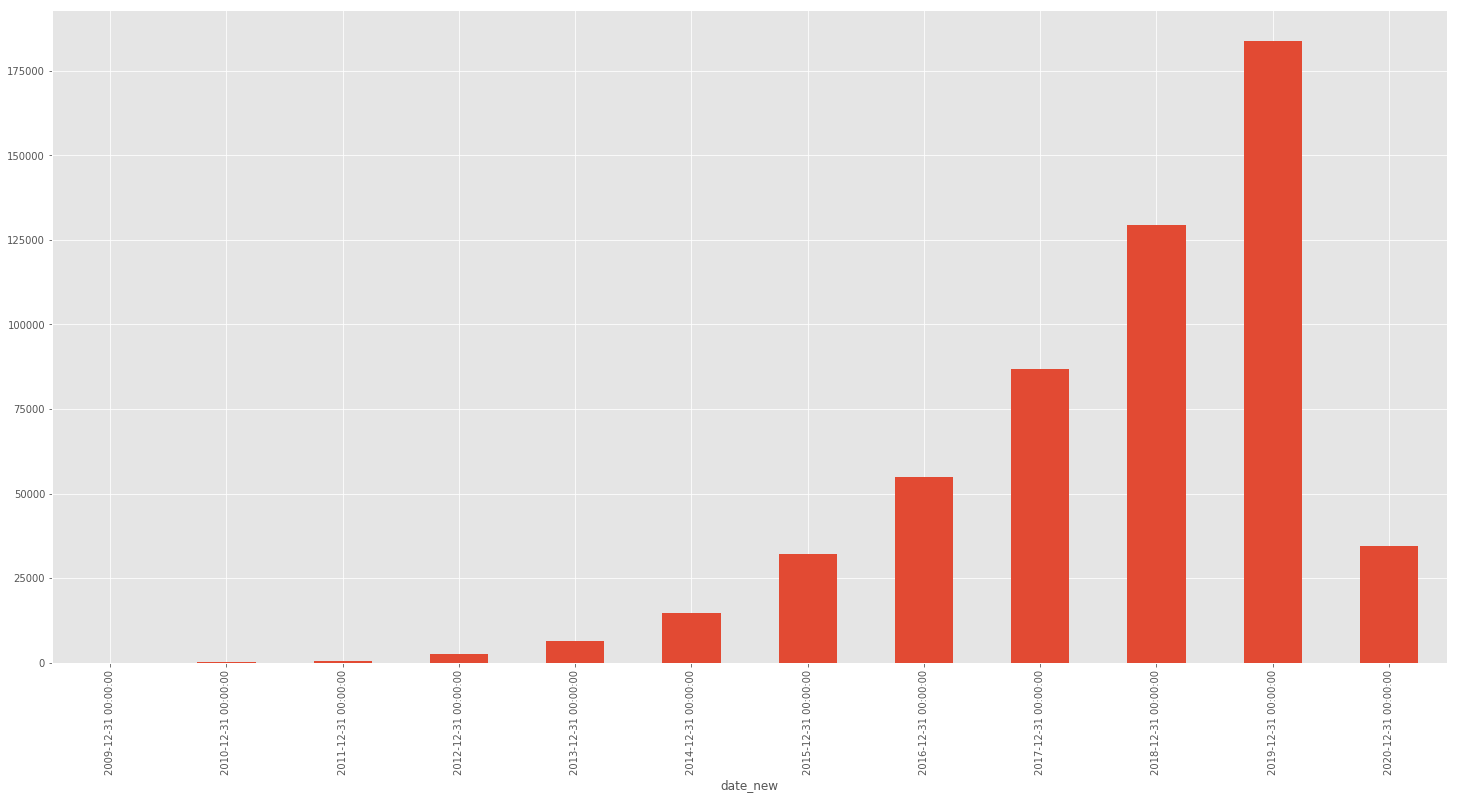

In [39]:
reviews_df_gz_new = reviews_df_gz.set_index('date_new')

g_reviews_df_gz_new = reviews_df_gz_new.groupby(pd.Grouper(freq='Y'))  # DataFrameGroupBy (grouped by Month)
g_reviews_df_gz_new.count()['id'].plot(kind='bar')

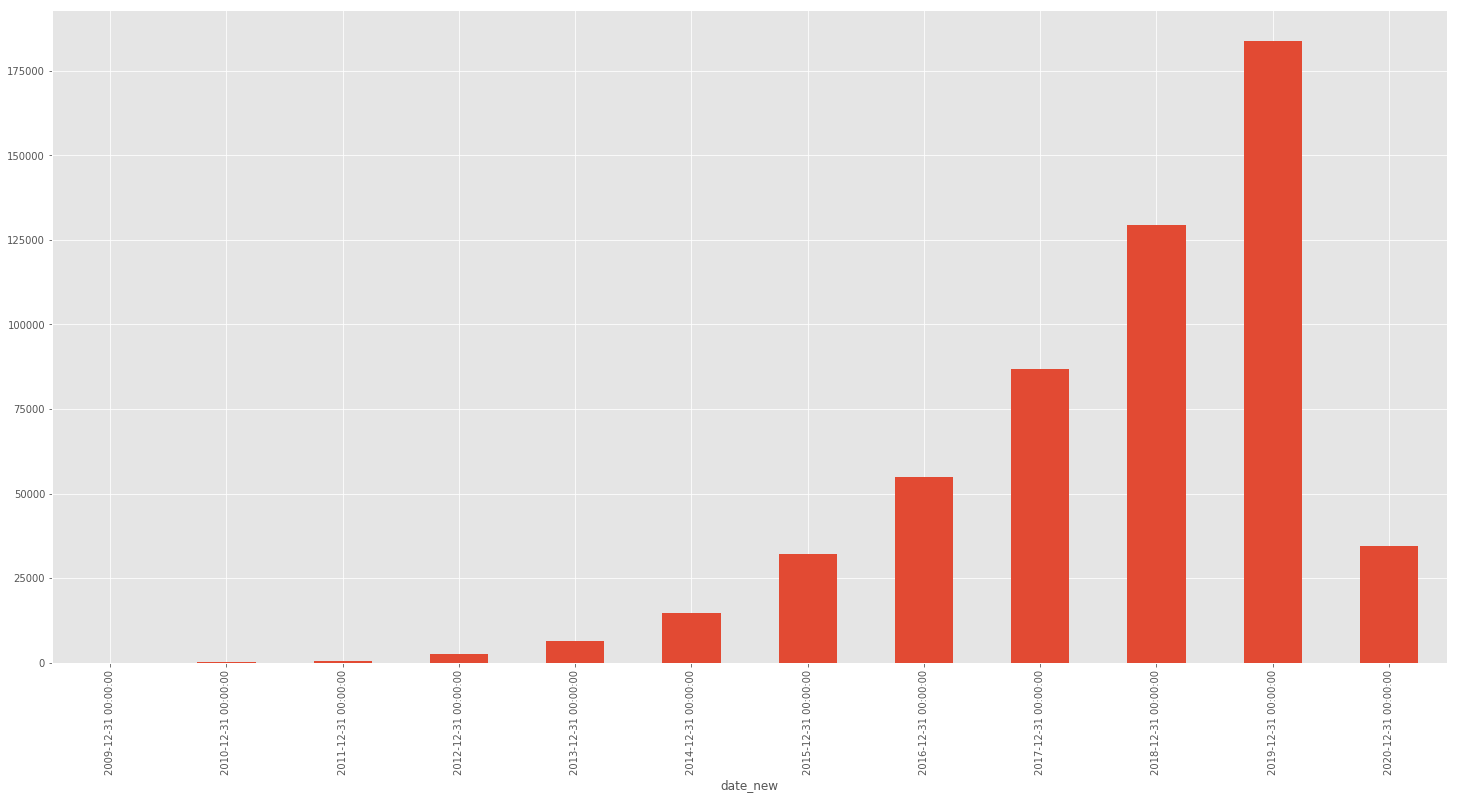

In [40]:
gr_reviews_df_gz_new = reviews_df_gz_new.groupby(pd.Grouper(freq='M'))  # DataFrameGroupBy (grouped by Month)
cnt_reviews_df_gz_new = g_reviews_df_gz_new.count()['id'].plot(kind='bar')

[Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec'),
 Text(0, 0, 'Jan\n2010'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec'),
 Text(0, 0, 'Jan\n2011'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec'),
 Text(0, 0, 'Jan\n2012'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec'),
 Text(0, 0, 'Jan\n2013'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun

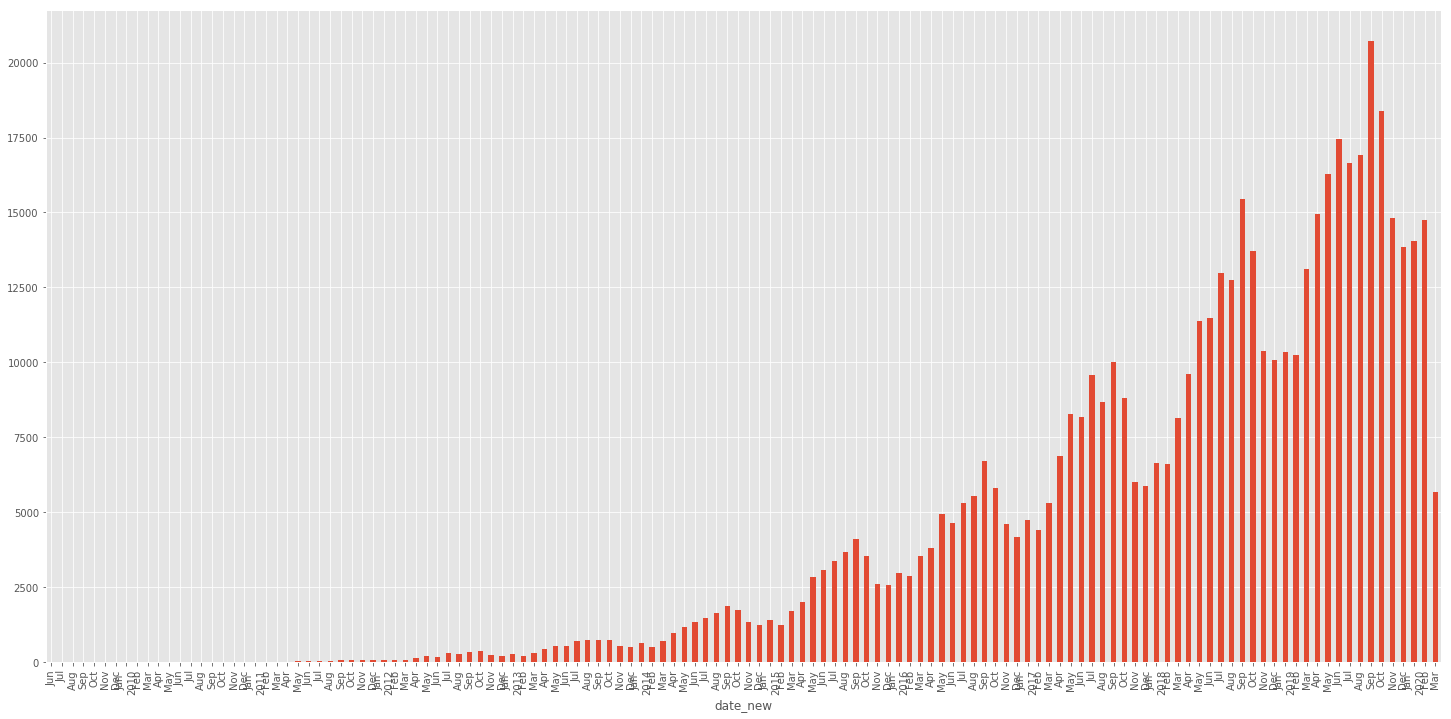

In [41]:
def axis_format(label):
    """ Convert time label to the format of pandas line plot """
    
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month

gr_reviews_df_gz_new = reviews_df_gz_new.groupby(pd.Grouper(freq='M'))  # DataFrameGroupBy (grouped by Month)
cnt_reviews_df_gz_new = gr_reviews_df_gz_new.count()['id']
ax = cnt_reviews_df_gz_new.plot(kind='bar')

# set a new name for a-axis
x_axis = [axis_format(x) for x in cnt_reviews_df_gz_new.index]
ax.set_xticklabels(x_axis)

Split date into day, month and year for further data processing.

In [42]:
reviews_df_gz_new['day'] = reviews_df_gz_new.index.day
reviews_df_gz_new['month'] = reviews_df_gz_new.index.month
reviews_df_gz_new['year'] = reviews_df_gz_new.index.year

reviews_df_gz_new.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,day,month,year
date_new,,,,,,,,,
2009-06-20,3176,4283,2009-06-20,21475,Milan,"excellent stay, i would highly recommend it. a...",20,6,2009
2010-11-07,3176,134722,2010-11-07,263467,George,Britta's apartment in Berlin is in a great are...,7,11,2010
2010-11-24,3176,144064,2010-11-24,76726,Patricia,"Fantastic, large place in good location. Only ...",24,11,2010
2010-12-21,3176,156702,2010-12-21,291657,Benedetta,L'appartamento di Britta è molto largo carino ...,21,12,2010
2011-01-04,3176,165048,2011-01-04,279789,Aude,We went in Berlin for the new year eve. The ap...,4,1,2011


#### <u>Question</u>: How data is distributed within a single year?

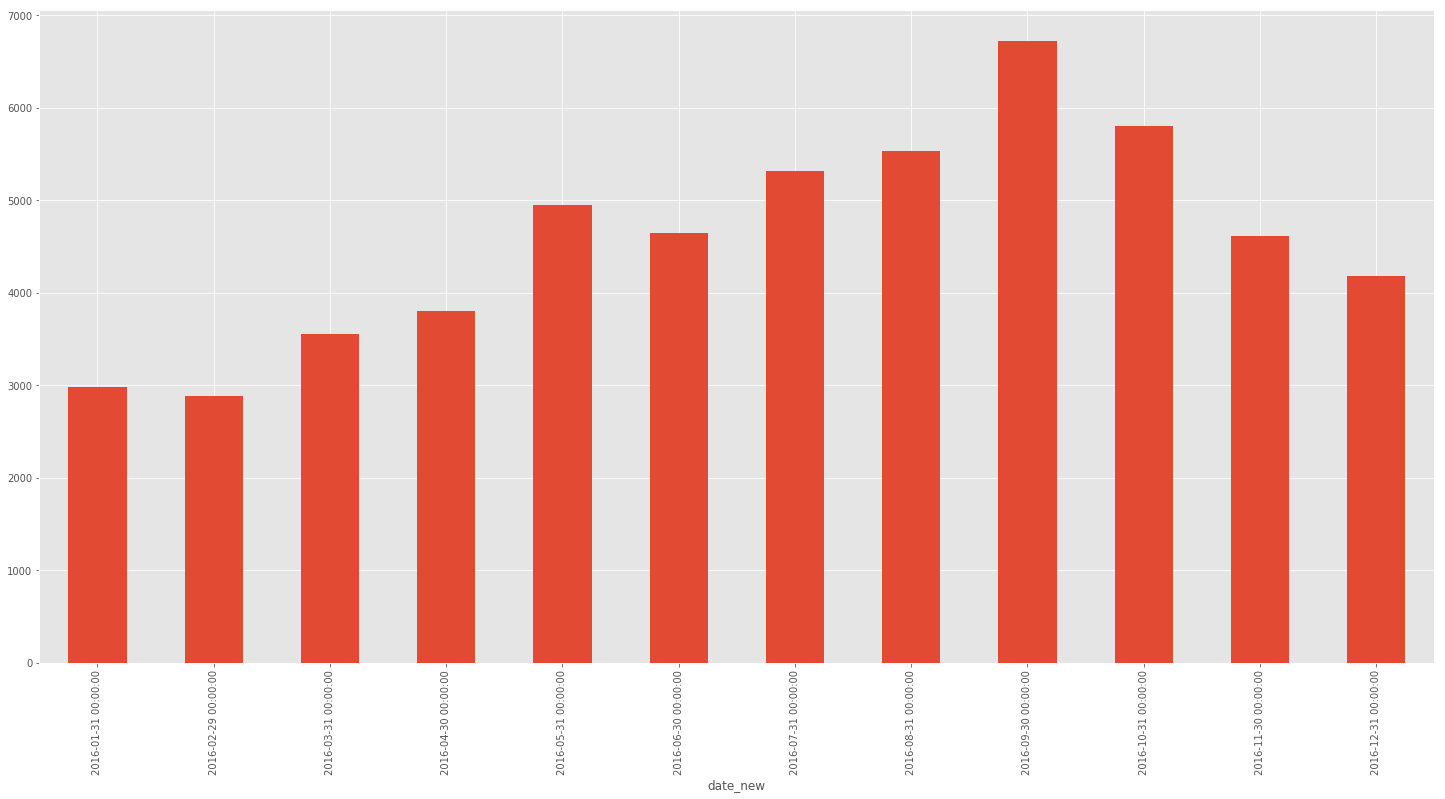

In [43]:
gr_reviews_df_gz_new = reviews_df_gz_new[reviews_df_gz_new['year'] == 2016].groupby(pd.Grouper(freq='M'))
cnt_reviews_df_gz_new = gr_reviews_df_gz_new.count()['id']
ax = cnt_reviews_df_gz_new.plot(kind='bar')

#### <u>Question</u>: How data is distributed within a multiple years?

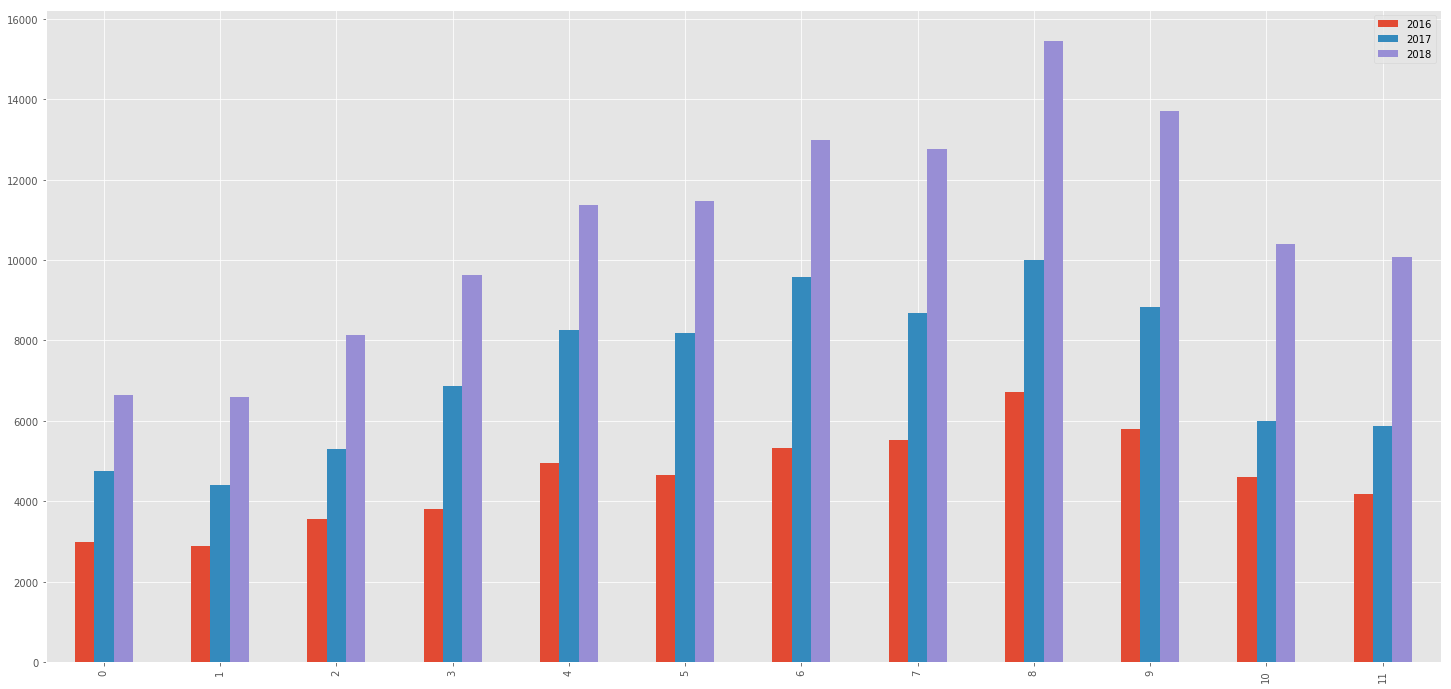

In [44]:
#
# Gathering data together by the year and plotting the data later on
#

gr_reviews_df_gz_2016 = reviews_df_gz_new[reviews_df_gz_new['year'] == 2016].groupby(pd.Grouper(freq='M'))
gr_reviews_df_gz_2017 = reviews_df_gz_new[reviews_df_gz_new['year'] == 2017].groupby(pd.Grouper(freq='M'))
gr_reviews_df_gz_2018 = reviews_df_gz_new[reviews_df_gz_new['year'] == 2018].groupby(pd.Grouper(freq='M'))


_gr_reviews_df_gz_2016 = gr_reviews_df_gz_2016.count()['id'].reset_index()
_gr_reviews_df_gz_2016 = _gr_reviews_df_gz_2016.drop(['date_new'], axis=1)

_gr_reviews_df_gz_2017 = gr_reviews_df_gz_2017.count()['id'].reset_index()
_gr_reviews_df_gz_2017 = _gr_reviews_df_gz_2017.drop(['date_new'], axis=1)

_gr_reviews_df_gz_2018 = gr_reviews_df_gz_2018.count()['id'].reset_index()
_gr_reviews_df_gz_2018 = _gr_reviews_df_gz_2018.drop(['date_new'], axis=1)


mult_years_df = pd.concat([_gr_reviews_df_gz_2016,
                          _gr_reviews_df_gz_2017, 
                          _gr_reviews_df_gz_2018], 
                         axis=1, ignore_index=True)
mult_years_df.columns = ['2016', '2017', '2018']
mult_years_df.plot(kind='bar')

#### <u>Question</u>: How data is distributed within a multiple years?

Calculating percentage of the comments.

In [45]:
# sample -> single year
# mult_years_df['2016_percentage'] = (100 * mult_years_df['2016']) / mult_years_df['2016'].sum()

In [46]:
# all years at once
for column in mult_years_df.columns:
    # take only original columns with year as name
    if len(column) == 4:
        mult_years_df['{0}_percentage'.format(column)] = (100 * mult_years_df[column]) / mult_years_df[column].sum()
        print('For column "{0}" check sum of percentage: {1:0.2f}'.format(column, 
                                                                     mult_years_df['{0}_percentage'.format(column)].sum()))
        
mult_years_df.columns

For column "2016" check sum of percentage: 100.00
For column "2017" check sum of percentage: 100.00
For column "2018" check sum of percentage: 100.00


Index(['2016', '2017', '2018', '2016_percentage', '2017_percentage',
       '2018_percentage'],
      dtype='object')

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

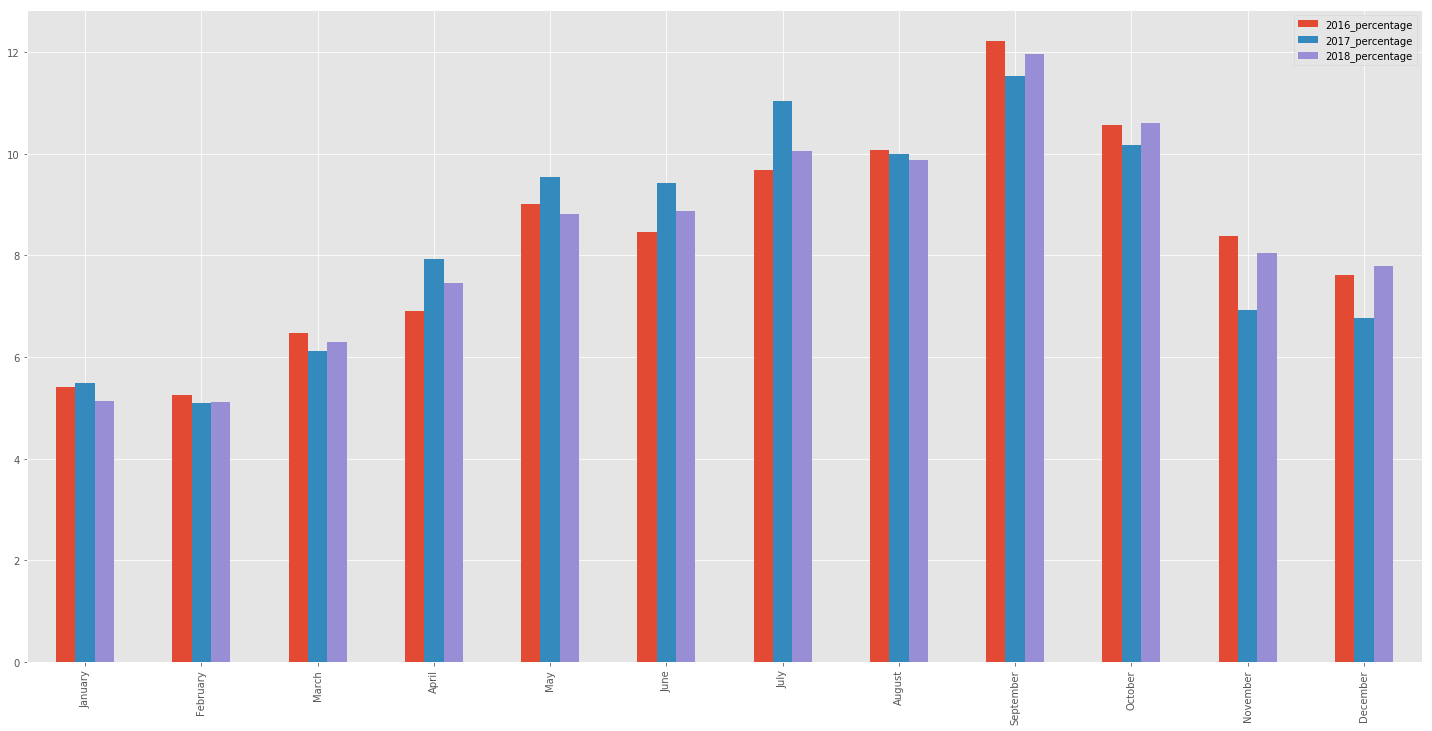

In [47]:
ax = mult_years_df[['2016_percentage', '2017_percentage', '2018_percentage']].plot(kind='bar')

# set a new name for a-axis
x_axis = ['January','February','March','April','May','June','July','August','September','October','November','December']
ax.set_xticklabels(x_axis)